## **PROBLEM STATEMENT:**

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.




## **PURPOSE OF SPAM MAIL DETECTION:**

The purpose of spam mail detection is to effectively detect spam mails and to extract spam mails using
machine learning algorithms.


## **IMPORITNG NECESSARY LIBRARIES**

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('spam.csv', encoding= "latin")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## **ANALYSIS OF DATASET**

The dataset contains two columns.Totally there are 5571 datas. The descriptive feature consists of text. The target feature i.e v1  consists of two classes ham and spam. Another column is named as v2 which consists of emails

## **EDA-EXPLORATORY DATA ANALYSIS**

In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## **HANDLING MISSING VALUES**

In [ ]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)
df


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.count()

v1    5572
v2    5572
dtype: int64

In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

## **RENAMING THE COLUMNS**

In [ ]:
df.rename(columns={'v1':'Types_Of_Mail', 'v2': 'Emails'}, inplace=True)
df.head(5)

,Types_Of_Mail,Emails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## **VISUALIZATION OF THE DATAS**

# ***COUNTPLOT***

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable. It uses the concept of a bar chart for the visual depiction.

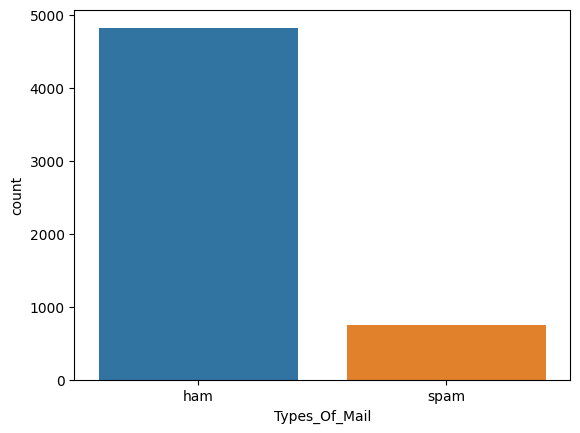

In [ ]:
sns.countplot(x='Types_Of_Mail',data=df)
plt.show()

# ***PIE-CHART***

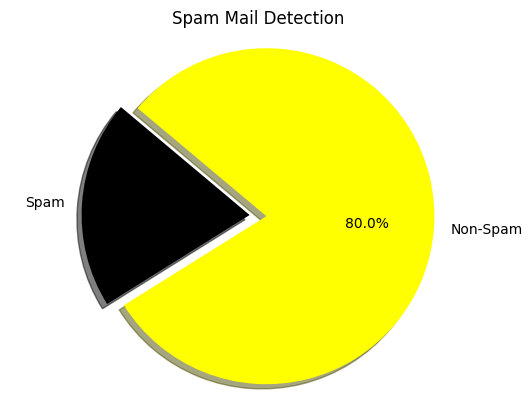

In [ ]:

spam_percentage = 20
non_spam_percentage = 80

# Data to plot
labels = 'Spam', 'Non-Spam'
sizes = [spam_percentage, non_spam_percentage]
colors = ['black', 'yellow']
explode = (0.1, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Spam Mail Detection')

plt.show()

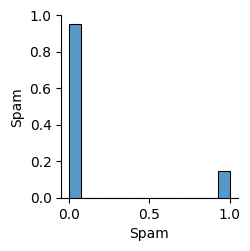

In [ ]:
sns.pairplot(df)
plt.show()

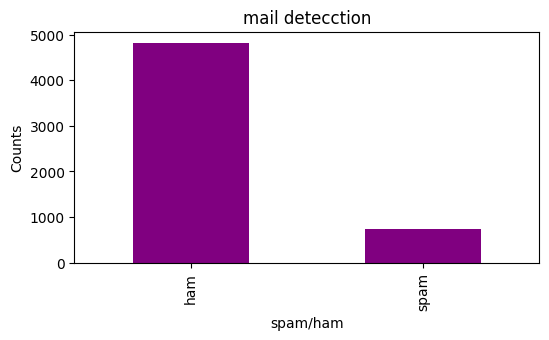

In [ ]:
datas = df.Types_Of_Mail.value_counts()
plt.figure(figsize = (6,3))
datas.plot(kind = "bar",color = "purple")
plt.ylabel("Counts")
plt.xlabel("spam/ham")
plt.title("mail detecction")
plt.show()

# ***ENCODING OF DATAS***

In [ ]:
df['Spam'] = df['Types_Of_Mail'].apply(lambda x: 1 if x == 'spam' else 0)

print(df.head())

  Types_Of_Mail                                             Emails  Spam
0           ham  Go until jurong point, crazy.. Available only ...     0
1           ham                      Ok lar... Joking wif u oni...     0
2          spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3           ham  U dun say so early hor... U c already then say...     0
4           ham  Nah I don't think he goes to usf, he lives aro...     0


In [ ]:
df.tail(3)

,Types_Of_Mail,Emails,Spam
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0
5571,ham,Rofl. Its true to its name,0


In [ ]:
!pip install scikit-learn

## **TRAINING,TESTING AND SPLITTING OF DATAS**



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.Emails,df.Spam,test_size=0.25)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

## **ML ALGORITHM**

In [ ]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)


MultinomialNB()

In [ ]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [ ]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

## **MODEL PREDICTION**

In [ ]:
predictions = classifier.predict(X_test_vectorized)

In [ ]:
emails=['Even my brother is not like to speak with me. They treat me like aids patent.']

In [ ]:
clf.predict(emails)

array([0])

In [ ]:
accuracy = accuracy_score(y_test, predictions)

In [ ]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.990667623833453


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1206
           1       0.98      0.95      0.96       187

    accuracy                           0.99      1393
   macro avg       0.99      0.97      0.98      1393
weighted avg       0.99      0.99      0.99      1393

